In [28]:
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
#df = pd.read_csv('D:\Desktop\simulacion_3\\Notebooks\data_latinoamerica.csv')
df = pd.read_csv("../data/data_latinoamerica.csv")

In [30]:
df['country_code'].value_counts()

country_code
BR    5565456
MX    2475518
PE    1883891
CO    1145596
AR     540095
CL     359733
DO      32703
EC      24775
VE      24775
GT      22793
UY      19820
PY      18829
HN      18829
CU      17838
NI      17838
SV      14865
PA      13874
BO       9910
CR       7928
PR        991
Name: count, dtype: int64

In [31]:
df = df[df['location_key'] == 'CL']

In [32]:
df.head(20)

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_confirmed,cumulative_deceased,cumulative_vaccine_doses_administered,population,...,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,new_recovered,cumulative_recovered
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115466,CL,2020-01-06,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115467,CL,2020-01-07,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115468,CL,2020-01-08,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115469,CL,2020-01-09,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN
6115470,CL,2020-01-10,CL,Chile,0.00,0.00,0.00,0.00,NaN,17574003.00,...,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,NaN,NaN


In [33]:
# Identificar las columnas que contienen valores 0
columns_with_zeros = df.columns[(df == 0).any()]

# Mostrar las columnas y las filas con valores 0
for column in columns_with_zeros:
    zero_rows = df[df[column] == 0]
    print(f"Column '{column}' has zero values in the following rows:")
    print(zero_rows)

# Alternativamente, para ver solo las columnas que tienen valores 0
print("Columns with zero values:", columns_with_zeros.tolist())

Column 'new_confirmed' has zero values in the following rows:
        location_key        date country_code country_name  new_confirmed  \
6115461           CL  2020-01-01           CL        Chile           0.00   
6115462           CL  2020-01-02           CL        Chile           0.00   
6115463           CL  2020-01-03           CL        Chile           0.00   
6115464           CL  2020-01-04           CL        Chile           0.00   
6115465           CL  2020-01-05           CL        Chile           0.00   
...              ...         ...          ...          ...            ...   
6115517           CL  2020-02-26           CL        Chile           0.00   
6115519           CL  2020-02-28           CL        Chile           0.00   
6115520           CL  2020-02-29           CL        Chile           0.00   
6115521           CL  2020-03-01           CL        Chile           0.00   
6115523           CL  2020-03-03           CL        Chile           0.00   

         new_

### Contar cuantos valores Nulos tiene cada columna

In [34]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
new_confirmed                              4
new_deceased                               4
cumulative_confirmed                       4
cumulative_deceased                        4
cumulative_vaccine_doses_administered    376
average_temperature_celsius                6
minimum_temperature_celsius                6
maximum_temperature_celsius                6
rainfall_mm                                6
relative_humidity                          6
new_recovered                             66
cumulative_recovered                     899
dtype: int64


### Contar cuantos 0 tiene cada columna

In [35]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.
Column 'cumulative_confirmed' has 57 rows with zero values.
Column 'cumulative_deceased' has 81 rows with zero values.
Column 'rainfall_mm' has 678 rows with zero values.
Column 'new_recovered' has 848 rows with zero values.
Column 'cumulative_recovered' has 15 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87, 'cumulative_confirmed': 57, 'cumulative_deceased': 81, 'rainfall_mm': 678, 'new_recovered': 848, 'cumulative_recovered': 15}


# Transformacion de DF

#### Realizo un filtrado debido que anterior y posterior a estas fechas hay valores nulos y/o datos errones

In [36]:
# Definir el rango de fechas
start_date = '2020-01-01'
end_date = '2022-08-31'

# Filtrar el DataFrame para mantener las filas dentro del rango de fechas
df_cl = df[(df['date'] >= start_date) & (df['date'] <= end_date)]

#### Elimino estas columnas por: 
#### las 2 primeras columnas tienen valores errones
#### la 3ra columna tiene muchos valores en 0
#### la 4 y 5ta columna tienen puros valores nulos
#### la 6 y 7ma columna no concuerdan con el de poblacion 
#### Prefiero trabajar con el promedio de la temperatura del dia

In [37]:
columns_to_drop = [
    'cumulative_confirmed', 
    'cumulative_deceased', 
    'rainfall_mm', 
    'new_recovered',
    'cumulative_recovered',
    'population_rural',
    'population_urban', 
    'minimum_temperature_celsius', 
    'maximum_temperature_celsius'
]

# Eliminar las columnas
df_cl.drop(columns=columns_to_drop, inplace=True)


C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\389060091.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl.drop(columns=columns_to_drop, inplace=True)


In [38]:
df_cl.head()

,location_key,date,country_code,country_name,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,20.80,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,19.89,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,20.14,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,21.08,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,NaN,17574003.00,8972014.00,8601989.00,...,19.46,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [39]:
# Contar cuántas filas contienen valores nulos en cada columna
null_counts = df_cl.isnull().sum()

# Filtrar solo las columnas que tienen valores nulos
columns_with_nulls = null_counts[null_counts > 0]

# Mostrar el recuento de filas con valores nulos por columna
print("Columns with null values and their counts:")
print(columns_with_nulls)

Columns with null values and their counts:
cumulative_vaccine_doses_administered    372
average_temperature_celsius                2
relative_humidity                          2
dtype: int64


In [40]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df_cl.columns[(df_cl == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df_cl[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87}


#### Vamos a imputar las columnas que tienen valores nulos y ceros 

In [41]:
# Imputación con la media para columnas específicas
df_cl['average_temperature_celsius'] = df_cl['average_temperature_celsius'].fillna(df_cl['average_temperature_celsius'].mean())
df_cl['relative_humidity'] = df_cl['relative_humidity'].fillna(df_cl['relative_humidity'].mean())


C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\2296990578.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['average_temperature_celsius'] = df_cl['average_temperature_celsius'].fillna(df_cl['average_temperature_celsius'].mean())
C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\2296990578.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['relative_humidity'] = df_cl['relative_humidity'].fillna(df_cl['relative_humidity'].mean())


In [42]:
# Rellenar con 0 donde la fecha sea menor a '2021-02-17'
fecha_limite = '2020-12-29'
df_cl.loc[df['date'] < fecha_limite] = df_cl.loc[df['date'] < fecha_limite].fillna(0)

In [43]:
# Contar cuántas filas contienen valores 0 en cada columna
columns_with_zeros = df.columns[(df == 0).any()]

# Crear un diccionario para almacenar el recuento de filas con valores 0
zero_counts = {column: (df[column] == 0).sum() for column in columns_with_zeros}

# Mostrar el recuento de filas con valores 0 por columna
print("\nColumns with zero values and their counts:")
for column, count in zero_counts.items():
    print(f"Column '{column}' has {count} rows with zero values.")

# Opcional: mostrar el diccionario completo de ceros
print("\nCounts of zero values per column:", zero_counts)


Columns with zero values and their counts:
Column 'new_confirmed' has 61 rows with zero values.
Column 'new_deceased' has 87 rows with zero values.
Column 'cumulative_confirmed' has 57 rows with zero values.
Column 'cumulative_deceased' has 81 rows with zero values.
Column 'rainfall_mm' has 678 rows with zero values.
Column 'new_recovered' has 848 rows with zero values.
Column 'cumulative_recovered' has 15 rows with zero values.

Counts of zero values per column: {'new_confirmed': 61, 'new_deceased': 87, 'cumulative_confirmed': 57, 'cumulative_deceased': 81, 'rainfall_mm': 678, 'new_recovered': 848, 'cumulative_recovered': 15}


In [44]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_cl.describe()

,new_confirmed,new_deceased,cumulative_vaccine_doses_administered,population,population_male,population_female,population_density,human_development_index,population_age_00_09,population_age_10_19,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,961.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4426.58,62.06,21853699.34,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,15.37,62.67,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
std,5930.18,370.52,22632949.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,4.95,9.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,0.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,4.09,33.53,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
25%,1227.25,11.00,0.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,11.13,55.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
50%,2369.00,32.00,15773547.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,15.34,62.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
75%,5515.00,71.00,44495954.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,19.78,69.19,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
max,38446.00,11447.00,61953990.00,17574003.00,8972014.00,8601989.00,25.71,0.83,2428079.00,2493879.00,...,26.17,89.07,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [45]:
#calcular columna vacunas administradas por dia
g=df_cl.cumulative_vaccine_doses_administered.tolist()
h=[0.0]
for i in range(1,len(g)):
    h.append(g[i]-g[i-1])
df_cl['vaccine_doses_administered_for_day']=h

df_cl.vaccine_doses_administered_for_day.max()

C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\740386398.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['vaccine_doses_administered_for_day']=h


430493.0

In [46]:
df_cl.drop(columns='cumulative_vaccine_doses_administered', inplace=True)

C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\850129655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl.drop(columns='cumulative_vaccine_doses_administered', inplace=True)


In [47]:
# Crear la columna del acumulado de vacunas diarias
df_cl['cumulative_vaccine_doses_administered'] = df_cl['vaccine_doses_administered_for_day'].cumsum()

col = list(df_cl.columns)
col.remove('cumulative_vaccine_doses_administered')
col.insert(7, 'cumulative_vaccine_doses_administered')
df_cl = df_cl[col]
df_cl

C:\Users\Casa\AppData\Local\Temp\ipykernel_16756\3662319478.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cl['cumulative_vaccine_doses_administered'] = df_cl['vaccine_doses_administered_for_day'].cumsum()


,location_key,date,country_code,country_name,new_confirmed,new_deceased,population,cumulative_vaccine_doses_administered,population_male,population_female,...,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate,vaccine_doses_administered_for_day
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,17574003.00,0.00,8972014.00,8601989.00,...,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116430,CL,2022-08-27,CL,Chile,7455.00,29.00,17574003.00,61836654.00,8972014.00,8601989.00,...,56.20,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,9156.00
6116431,CL,2022-08-28,CL,Chile,6657.00,30.00,17574003.00,61837598.00,8972014.00,8601989.00,...,43.79,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,944.00
6116432,CL,2022-08-29,CL,Chile,4659.00,23.00,17574003.00,61870447.00,8972014.00,8601989.00,...,55.35,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,32849.00
6116433,CL,2022-08-30,CL,Chile,3348.00,10.00,17574003.00,61902121.00,8972014.00,8601989.00,...,63.18,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40,31674.00


In [48]:
col = list(df_cl.columns)
col.remove('vaccine_doses_administered_for_day')
col.insert(6, 'vaccine_doses_administered_for_day')
df_cl = df_cl[col]
df_cl

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115461,CL,2020-01-01,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.80,57.37,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115462,CL,2020-01-02,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.89,62.00,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115463,CL,2020-01-03,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.14,65.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115464,CL,2020-01-04,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,21.08,65.11,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115465,CL,2020-01-05,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.46,64.95,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6116430,CL,2022-08-27,CL,Chile,7455.00,29.00,9156.00,17574003.00,61836654.00,8972014.00,...,12.85,56.20,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116431,CL,2022-08-28,CL,Chile,6657.00,30.00,944.00,17574003.00,61837598.00,8972014.00,...,12.08,43.79,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116432,CL,2022-08-29,CL,Chile,4659.00,23.00,32849.00,17574003.00,61870447.00,8972014.00,...,11.44,55.35,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6116433,CL,2022-08-30,CL,Chile,3348.00,10.00,31674.00,17574003.00,61902121.00,8972014.00,...,11.38,63.18,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [49]:
# Calcular el rango intercuartílico (IQR)
Q1 = df_cl['vaccine_doses_administered_for_day'].quantile(0.25)
Q3 = df_cl['vaccine_doses_administered_for_day'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df_cl[(df_cl['vaccine_doses_administered_for_day'] >= lower_bound) & (df_cl['vaccine_doses_administered_for_day'] <= upper_bound)]

In [50]:
lower_bound

-187545.375

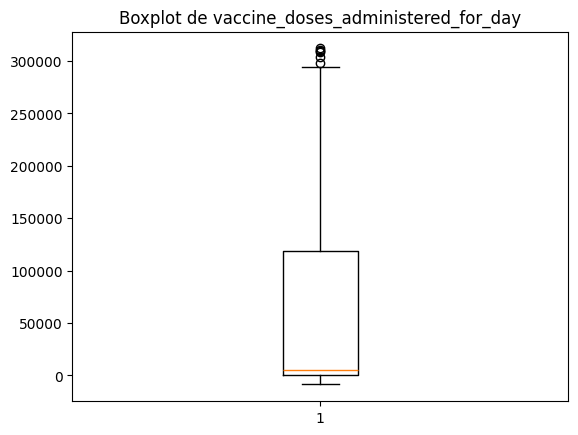

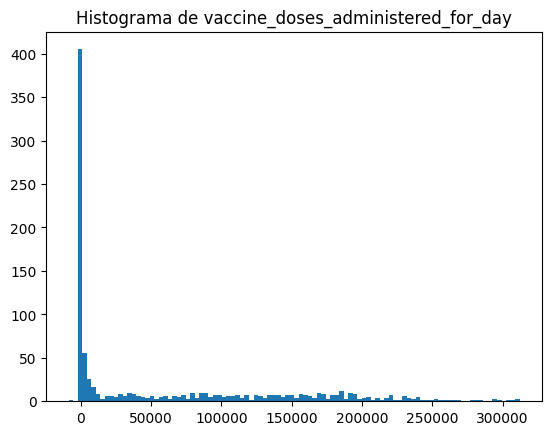

In [51]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [52]:
avg_vaccine = round((upper_bound - lower_bound)/2,0)

df_prueba = df_cl
# Reemplazar los valores por encima del valor máximo con el promedio
df_prueba['vaccine_doses_administered_for_day'] = df_prueba['vaccine_doses_administered_for_day'].apply(
    lambda x: avg_vaccine if x > upper_bound else x
)

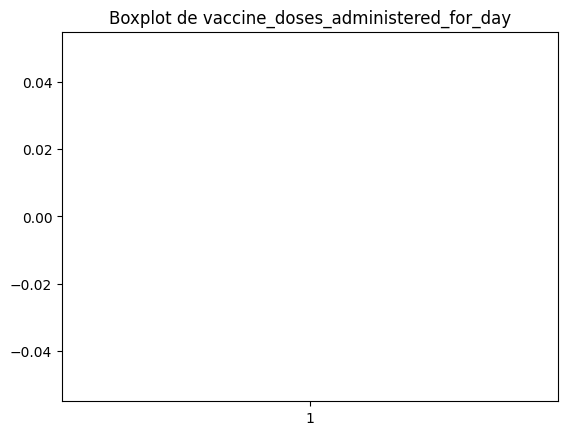

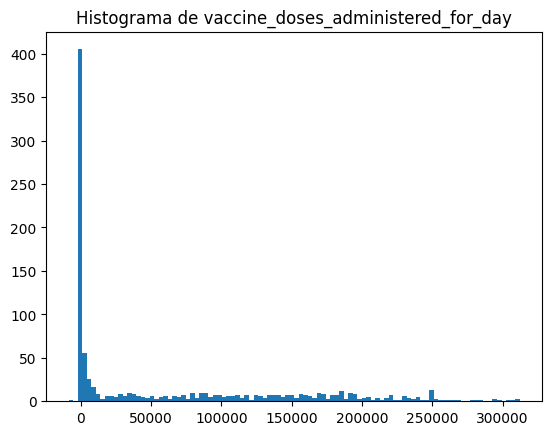

In [53]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_prueba['vaccine_doses_administered_for_day'])
plt.title('Boxplot de vaccine_doses_administered_for_day')
plt.show()

# Histograma con matplotlib
plt.hist(df_prueba['vaccine_doses_administered_for_day'], bins=100) # el número de bins se puede ajustar a preferencia 
plt.title('Histograma de vaccine_doses_administered_for_day')
plt.show()

In [54]:
df_prueba.to_csv('data\processed\covid19_Chile.csv', index=False)


In [59]:
df_prueba.iloc[55:80]

,location_key,date,country_code,country_name,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
6115516,CL,2020-02-25,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.71,55.20,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115517,CL,2020-02-26,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.61,51.28,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115518,CL,2020-02-27,CL,Chile,1.00,0.00,0.00,17574003.00,0.00,8972014.00,...,21.00,52.04,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115519,CL,2020-02-28,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.80,57.59,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115520,CL,2020-02-29,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.82,64.72,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115521,CL,2020-03-01,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,19.94,67.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115522,CL,2020-03-02,CL,Chile,1.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.30,62.48,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115523,CL,2020-03-03,CL,Chile,0.00,0.00,0.00,17574003.00,0.00,8972014.00,...,20.58,64.47,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115524,CL,2020-03-04,CL,Chile,2.00,0.00,0.00,17574003.00,0.00,8972014.00,...,21.53,60.87,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
6115525,CL,2020-03-05,CL,Chile,1.00,0.00,0.00,17574003.00,0.00,8972014.00,...,22.22,55.27,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40


In [60]:
df_prueba.describe()

,new_confirmed,new_deceased,vaccine_doses_administered_for_day,population,cumulative_vaccine_doses_administered,population_male,population_female,population_density,human_development_index,population_age_00_09,...,average_temperature_celsius,relative_humidity,population_largest_city,area_rural_sq_km,area_urban_sq_km,life_expectancy,adult_male_mortality_rate,adult_female_mortality_rate,pollution_mortality_rate,comorbidity_mortality_rate
count,974.00,974.00,954.00,974.00,954.00,974.00,974.00,974.00,974.00,974.00,...,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00,974.00
mean,4426.58,62.06,63419.99,17574003.00,21999941.64,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.37,62.67,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
std,5930.18,370.52,83466.21,0.00,22629778.07,0.00,0.00,0.00,0.00,0.00,...,4.95,9.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
min,0.00,0.00,-8648.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,4.09,33.53,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
25%,1227.25,11.00,0.00,17574003.00,0.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,11.13,55.39,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
50%,2369.00,32.00,5865.50,17574003.00,16211028.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,15.34,62.80,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
75%,5515.00,71.00,125030.25,17574003.00,44752642.50,8972014.00,8601989.00,25.71,0.83,2428079.00,...,19.78,69.19,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
max,38446.00,11447.00,312031.00,17574003.00,61931427.00,8972014.00,8601989.00,25.71,0.83,2428079.00,...,26.17,89.07,6723516.00,709418.00,12027.00,80.04,107.67,59.03,25.30,12.40
